In [ ]:
from google.colab import files

uploaded = files.upload()

Saving loan-train.csv to loan-train.csv


In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing
import sklearn

In [ ]:
#reading the data & checking for missing values

train = pd.read_csv('loan-train.csv')
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train.dropna(inplace=True)

In [ ]:
train = train[['Gender','Married','Education','Self_Employed','Credit_History','Loan_Status']]

train['Gender']=train['Gender'].replace(to_replace='Male',value='1')
train['Gender']=train['Gender'].replace(to_replace='Female',value='0')


train['Married']=train['Married'].replace(to_replace='Yes',value='1')
train['Married']=train['Married'].replace(to_replace='No',value='0')


train['Self_Employed']=train['Self_Employed'].replace(to_replace='No',value='0')
train['Self_Employed']=train['Self_Employed'].replace(to_replace='Yes',value='1')


train['Education']=train['Education'].replace(to_replace='Graduate',value='1')
train['Education']=train['Education'].replace(to_replace='Not Graduate',value='0')

In [ ]:
#splitting the dataset into train and test sets

X = train.drop(columns=['Loan_Status'])
y = train.Loan_Status


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#building the model and fitting the train set

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

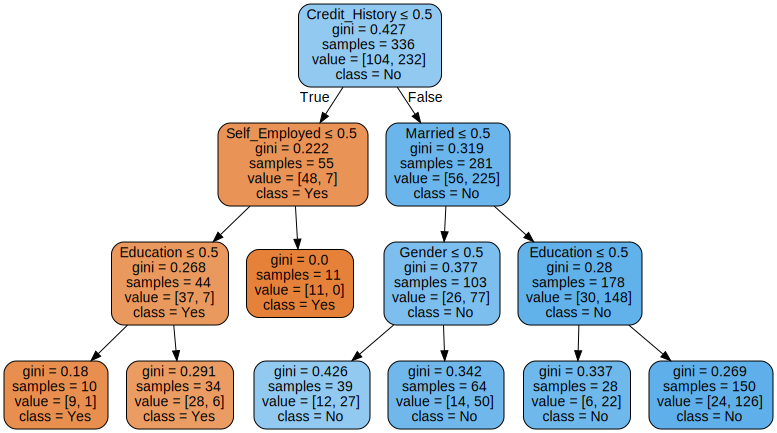

In [ ]:
#visualising the decision tree

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=['Gender','Married','Education','Self_Employed','Credit_History'],
                               class_names=['Yes','No'],filled=True,
                                rounded=True,  
                              special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("gini")
graph

In [ ]:
clf.score(X_test,y_test)

0.7986111111111112